### 6.3 The secant method: SciPy
* Reference: http://hplgit.github.io/prog4comp/doc/pub/p4c_Python.pdf, S.Linge & H.P.Langtangen, Chap.6.3., pp. 236-239.
* SciPy code: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

When findung the derivative $f'(x)$ in Newton's method is problematic, or when function evalutations take too long; we maya adjust the method slightly.

Instead of using tangent lines to the graph we may use secants.
The approach is reffered to as the $secant$ $method$, and the idea is illustrated graphically in Figure 6.2 for our example problem $x^2 -9 =0$.

The idea of the secant method is to think as in Newton's method, but instead of using $f'(x_n)$, we approximate this derivative by a finite difference or the $secant$, i.e., the slope of the straight line that goes through the two most recent approximations $x_n$ and $x_{n+1}$. This slope reads

$$\frac{f(x_n)-f(x_{n-1})}{x_{n}-x_{n-1}}$$

Inserting this expression for $f'(x_n)$ in Newton's method simply gives us the secant method:
$$x_{n+1} = x_{n}-\frac{f(x_n)}{\frac{f(x_n)-f(x_{n-1})}{x_{n}-x_{n-1}}},$$
or
$$x_{n+1} = x_{n}-f(x_n)\frac{x_n-x_{n-1}}{f(x_n)-f(x_{n-1})}$$

(3.000000000000001,       converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: 3.000000000000001)
999991


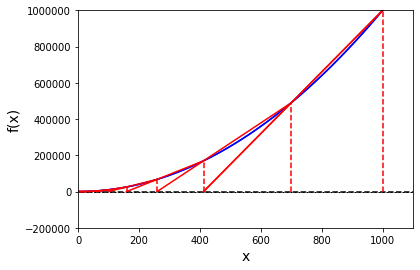

In [9]:
from scipy import optimize
import matplotlib.pyplot as plt
f = lambda x: x**2 - 9
vec_res = optimize.newton(f, 100, full_output=True)
print (vec_res)


#plot graph
x0 = 1000; x1 = 700; eps=1.0e-6; iteration_counter = 0

f_x0 = f(x0)
print(f_x0)

import matplotlib.pyplot as plt
import numpy as np 
x = np.linspace(0, 1200, 100)
x2= x**2 

fig,ax = plt.subplots()
ax.plot(x,x2, 'b')
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)
plt.xlim(0,1100)
plt.ylim(-200000,1000000)
y3 = 1000*(x-500)+249745
plt.plot([0, 100000], [0, 0], 'k-', lw=1,dashes=[2, 2])


f_x0 = f(x0)
f_x1 = f(x1)

x = np.arange(1,x0)
y = f(x)
plt.plot(x, y, color='b')
plt.axhline(y=0, color='k', linestyle='--')
    
# Initial point of iteration
plt.plot([x0,x0],[0,f_x0], color='r', linestyle='--')
plt.plot([x1,x1],[0,f_x1], color='r', linestyle='--')

denominator = float(f_x1 - f_x0)/(x1 - x0)
plt.plot([x0,x0-f_x0/denominator],[f_x0,0],color='r', linestyle='-')

while abs(f_x1) > eps and iteration_counter < 100:
    try:
        denominator = float(f_x1 - f_x0)/(x1 - x0)
        x = x1 - float(f_x1) / denominator
    except ZeroDivisionError:
        print("Error! - denominator zero for x = ", x)
        sys.exit(1)  # Abort with error
    plt.plot([x0,x0-f_x0/denominator],[f_x0,0],color='r', linestyle='-')
    x0 = x1
    x1 = x
    f_x0 = f_x1
    f_x1 = f(x1)
    plt.plot([x1,x1],[0,f_x1], color='r', linestyle='--')
  
    iteration_counter += 1
# Here, either a solution is found, or too many iterations
if abs(f_x1) > eps:
    iteration_counter = -1
